<h1 align="center">Logistic Regression - Predict Extra Marital Affair</h1>

---

## About the Data

<pre>
Variables that is present in the dataset for prediction are :-
<b>    1. rate_marriage(women’s rating for her marriage) 
    2. age(women’s age)
    3. yrs_married(number of years married) 
    4. children(no. of children she has)
    5. religious(on the scale of 1 -5 whether she believe in religion or not)
    6. education(level of education) 
    7. occupation (Rating from 0 to 5 : Level of Qualification)
    8. occupation of husband (Rating from 0 to 5 : Level of Qualification)
    9. affairs
    
Note in all the cases Rank or Level 5 means the highest

## Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

---

## Data Preporcessing

### Loading the Data

In [2]:
Data = sm.datasets.fair.load_pandas().data
Data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


<pre>Inorder to convert this problem statement for implementing in using Logistics Regression or as a Classification Problem

<b>We needs to convert the dependent variable (affairs feature) into a binarry class.</b>
If the Target Variable = 0  --> Woman having no extra marital affairs
If the Target Variable >0   --> Woman having extra marital affairs

In [3]:
Data['affairs'] = (Data.affairs > 0).astype(int) # Binary Conversion

Data.affairs.unique()

array([1, 0])

All you need to know about DMATRICES
https://patsy.readthedocs.io/en/latest/API-reference.html

In [4]:
y,X=dmatrices('affairs~rate_marriage + age + yrs_married + children +  religious + educ + C(occupation)+C(occupation_husb)',\
              Data ,return_type="dataframe")
X.head()

# y ~ Dependent // TARET VARIABLE
# X ~ Independent Variable

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [5]:
X = X.rename(columns ={'C(occupation)[1.0]':'occ_1',\
                       'C(occupation)[T.2.0]':'occ_2',\
                       'C(occupation)[T.3.0]' : 'occ_3',\
                       'C(occupation)[T.4.0]' : 'occ_4',\
                       'C(occupation)[T.5.0]':'occ_5',\
                       'C(occupation)[T.6.0]':'occ_6',\
                       \
                       'C(occupation_husb)[T.2.0]':'occ_husb_2', \
                       'C(occupation_husb)[T.3.0]' :'occ_husb_3',\
                       'C(occupation_husb)[T.4.0]':'occ_husb_4' , \
                       'C(occupation_husb)[T.5.0]':'occ_husb_5', \
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


<pre>Here inshort we have taken the dumies of the Occupation and the Occupation_Husband Attribute

<pre><b>Combining the Independent and the Dependent Attributes // Features

In [6]:
Data=pd.concat([X,y],axis=1)
Data.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


### Checking for NULL Values

In [7]:
Data.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affairs          0
dtype: int64

In [8]:
Data.isnull().sum().any()

False

### Checking whether the dataset is balanced or not

In [9]:
print(Data[Data["affairs"]==0].shape)
print(Data[Data["affairs"]==1].shape)

(4313, 18)
(2053, 18)


C:\Users\khwaj\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


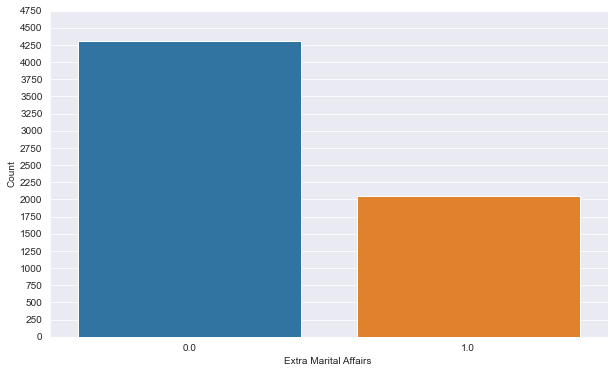

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))

plt.ylabel('Count')
plt.xlabel('Extra Marital Affairs ')

plt.show()

<pre><b>
We can conclude from the plot that the dataset is imbalance
Class 0 is almost the double of CLass 1.

So we need to up-sample to balance the dataset.

In [11]:
# from imblearn.random_sampling  import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

rdm=RandomOverSampler()
X,y=rdm.fit_sample(X,y)

Data = pd.concat([X,y],axis=1)  #updating the balanced form of dataset

In [12]:
print(Data[Data["affairs"]==0].shape)
print(Data[Data["affairs"]==1].shape)

(4313, 18)
(4313, 18)


---

## Modelling

#### Train Test Split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#### Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_predicted=lr.predict(x_test)
y_train_predicted=lr.predict(x_train)

C:\Users\khwaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\khwaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


---

## Model Evaluation

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report

In [16]:
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,y_predicted))

train set accuracy score:  0.6842028985507247
test set accuracy score : 0.6859791425260718


<pre><b>As we see there is not large deviation between dataset hence model is in normal state.

#### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
print(f'Confusion Matix \n{confusion_matrix(y_test,y_predicted)}')

'''
TRUE-POSITIVE
TRUE- NEGATIVE
                FALSE-POSITIVE FALSE-NEGATIVE
'''

Confusion Matix 
[[623 270]
 [272 561]]


'\nTRUE-POSITIVE\nTRUE- NEGATIVE\n                FALSE-POSITIVE FALSE-NEGATIVE\n'

#### Classification Report

In [18]:
from sklearn.metrics import classification_report
print(f'Classification Report \n{classification_report(y_test,y_predicted)}')

Classification Report 
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70       893
         1.0       0.68      0.67      0.67       833

    accuracy                           0.69      1726
   macro avg       0.69      0.69      0.69      1726
weighted avg       0.69      0.69      0.69      1726



In [20]:
# ROC CURVE
# Also one of the metrix to calculate

## Testing the Model

In [21]:
print("Your prediction is  :",lr.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]])))

Your prediction is  : [0.]


In [22]:
Data.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ', 'affairs'],
      dtype='object')

---

## Pickle File For Deployment

In [24]:
import pickle

# Open a file 
file = open('logistic_reg.pkl', 'wb')

# dump information to that file
pickle.dump(lr,file)

In [1]:
import pickle
import numpy as np

d = np.array([0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]).reshape(1,-1)

model = pickle.load(open('logistic_reg.pkl', 'rb'))
prediction = model.predict(d)
output = prediction[0]
output

0.0